# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [1]:
!pip3 install selenium

In [2]:
!pip3 install jpype1

In [3]:
!pip3 install konlpy

## 2. 사용할 패키지 호출

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By

ModuleNotFoundError: No module named 'selenium'

## 3. 프로그래밍

In [2]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [3]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.3.19~2023.4.15'

In [4]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [5]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [6]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

'미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n챗GPT 충격파… 성큼 다가온 인공지능\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n헤어질 결심\n노키즈존 확산, 어떻게 볼 것인가?\n대리모 산업의 윤리적 문제와 해결방안\n[토론문 1] 저출산·고령화와 인구정책\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n챗GPT에 빼앗긴 밥그릇\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n최저임금제도 개선방안에 관한 연구\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n구글 시대 저무나? 인공지능 ‘챗GPT’ 돌풍\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n사회복지에서의 인권에 관한 일 고찰\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n고교학점제의 쟁점과 과제 분석\n행동주의 상담과 인본주의 상담의 특성 비교\n그리스-로마 신화의 교훈\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n한국 인공지능 교육의 방향\n나이팅게일과 업적\n다이어트, 당신은 건강합니까?\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향: 집단효능감의 매개효과\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n촉법소년 상한연령 하향 인식에의 영향요인 - 소년사법 실무전문가들을 중심으로 -\n고교학점제 도입 추진 정책에 대한 비판적 검토\n학술 2 - 유기동물 안락사의 윤리적 고찰과 사례를 통한 발전적 해결방안\nThe Impact of Employees\' Growth Mindset on Organizational Citizenship Behavior in Small and Medium-sized Enterprises (SME

In [7]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 챗    충격파  성큼 다가온 인공지능 촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 헤어질 결심 노키즈존 확산  어떻게 볼 것인가  대리모 산업의 윤리적 문제와 해결방안  토론문    저출산 고령화와 인구정책 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색    세대의 개인주의 문화  어떻게 볼 것인가  챗   에 빼앗긴 밥그릇 챗봇 기반 인공지능 교육 프로그램 개발과 적용 최저임금제도 개선방안에 관한 연구 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 구글 시대 저무나  인공지능  챗     돌풍 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 사회복지에서의 인권에 관한 일 고찰 인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 고교학점제의 쟁점과 과제 분석 행동주의 상담과 인본주의 상담의 특성 비교 그리스 로마 신화의 교훈 미혼 성인남녀의 저출산 정책 인식에 관한 연구 한국 인공지능 교육의 방향 나이팅게일과 업적 다이어트  당신은 건강합니까  음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향  집단효능감의 매개효과 자연 상태에서 일어나는 음펨바 효과에 대한 연구 촉법소년 상한연령 하향 인식에의 영향요인   소년사법 실무전문가들을 중심으로   고교학점제 도입 추진 정책에 대한 비판적 검토 학술     유기동물 안락사의 윤리적 고찰과 사례를 통한 발전적 해결방안                                                                                                                                                           

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [ ]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


In [2]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

ModuleNotFoundError: No module named 'pandas'

In [10]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
531,정서조절전략,6
532,심리적,3
533,안녕감,3
534,간,1


In [11]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
212,연구,20
254,인공지능,20
131,분석,9
42,교육,7
216,영향,7
...,...,...
144,사상체질,1
143,사례연구,1
141,사건,1
140,삐아제,1


In [12]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [13]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


<AxesSubplot: xlabel='n', ylabel='word'>

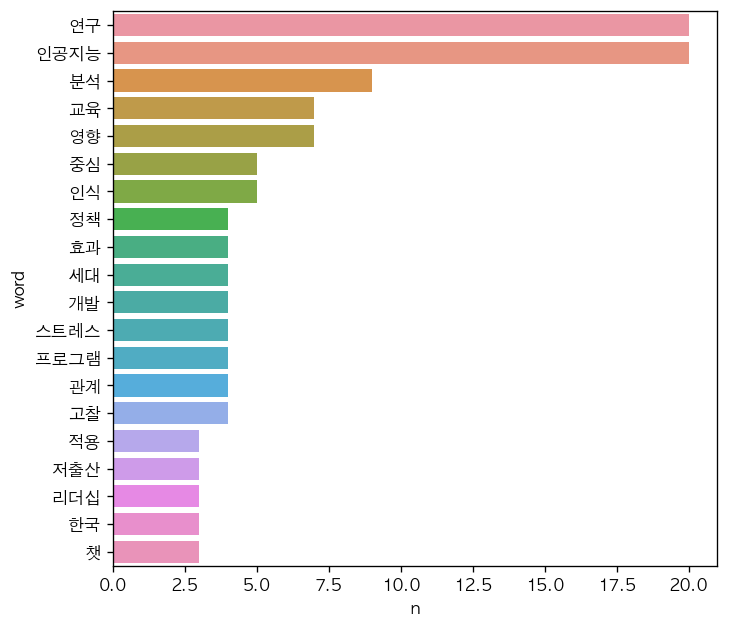

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [15]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [16]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'연구': 20,
 '인공지능': 20,
 '분석': 9,
 '교육': 7,
 '영향': 7,
 '중심': 5,
 '인식': 5,
 '정책': 4,
 '효과': 4,
 '세대': 4,
 '개발': 4,
 '스트레스': 4,
 '프로그램': 4,
 '관계': 4,
 '고찰': 4,
 '적용': 3,
 '저출산': 3,
 '리더십': 3,
 '한국': 3,
 '챗': 3,
 '년': 3,
 '기반': 3,
 '변화': 3,
 '이론': 3,
 '간호사': 3,
 '것': 2,
 '사회': 2,
 '수': 2,
 '노키즈존': 2,
 '담론': 2,
 '아동': 2,
 '예술': 2,
 '대인관계': 2,
 '인공지능교육': 2,
 '창의성': 2,
 '동향': 2,
 '상담': 2,
 '자아존중감': 2,
 '나이팅게일': 2,
 '자연': 2,
 '사례': 2,
 '문제': 2,
 '비판적': 2,
 '비판': 2,
 '미래': 2,
 '간호대학생': 2,
 '비교': 2,
 '확산': 2,
 '간호': 2,
 '방향': 2,
 '의': 2,
 '촉법소년': 2,
 '과제': 2,
 '교양교육': 2,
 '하향': 2,
 '실험': 2,
 '건강': 2,
 '식': 2,
 '스마트시티': 2,
 '고교학점제': 2,
 '해결방안': 2,
 '윤리적': 2,
 '윤리': 2,
 '개선방안': 2,
 '경험': 2,
 '시사점': 2,
 '임파워먼트': 1,
 '자기지각': 1,
 '임상간호사': 1,
 '유보통합': 1,
 '영화': 1,
 '자동창작시대': 1,
 '위대한': 1,
 '웹툰': 1,
 '작품': 1,
 '우수성': 1,
 '음악': 1,
 '장애': 1,
 '쟁점': 1,
 '저감': 1,
 '유효숫자': 1,
 '원소주기율표': 1,
 '우주': 1,
 '원소': 1,
 '저항성': 1,
 '적양배추': 1,
 '영향요': 1,
 '전': 1,
 '전공만족도': 1,
 '전망해': 1,
 '염기': 1,
 '일': 1,
 '인지적': 1,
 

In [17]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

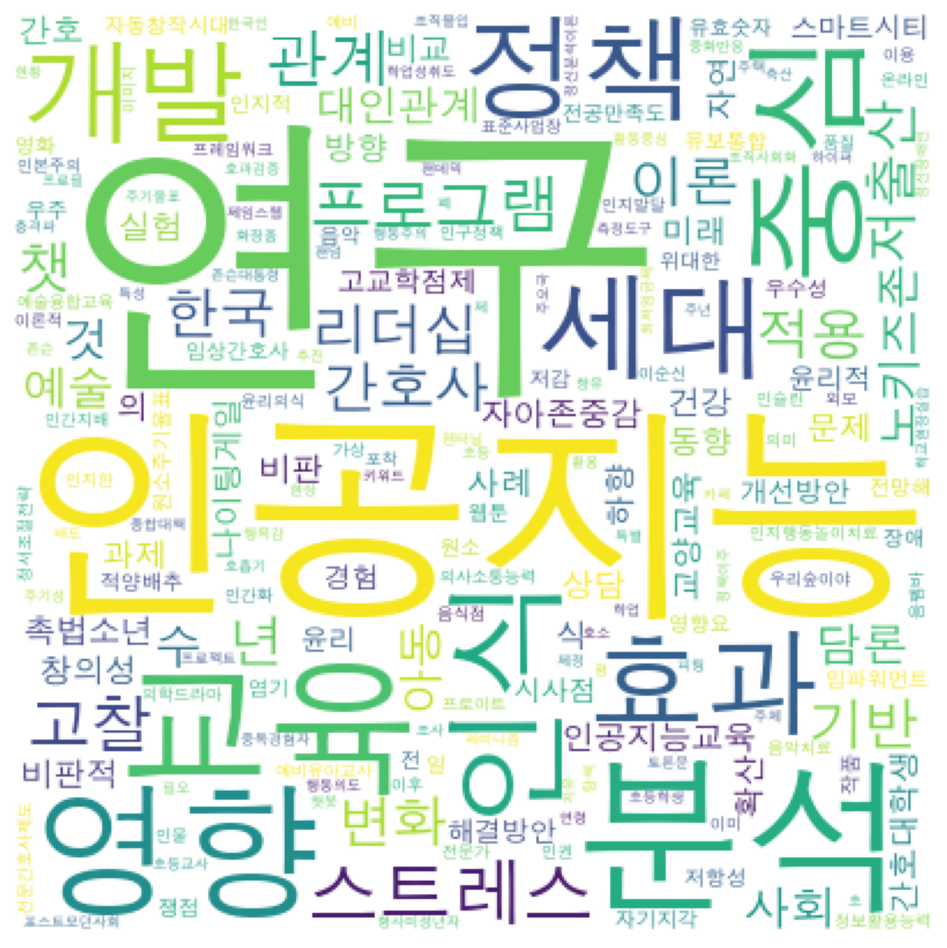

In [18]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  
Reinitialized existing Git repository in /Users/uuu9/GIT/Riss_Popular_thesis_wordCloud/.git/  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  
[main d8ae137] init commit  
 6 files changed, 537 insertions(+), 334 deletions(-)  
 create mode 100644 barplot/2023.3.5~2023.4.1.png  
 create mode 100644 csv/2023.3.5~2023.4.1.csv  
 create mode 100644 txt/2023.3.5~2023.4.1.txt  
 create mode 100644 wordcloud/2023.3.5~2023.4.1.png  
➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  
Enumerating objects: 19, done.  
Counting objects: 100% (19/19), done.  
Delta compression using up to 10 threads  
Compressing objects: 100% (12/12), done.  
Writing objects: 100% (12/12), 900.67 KiB | 19.58 MiB/s, done.  
Total 12 (delta 6), reused 0 (delta 0), pack-reused 0  
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.  
To https://github.com/GUuu9/Riss_Popular_thesis_wordCloud.git  
   5137005..d8ae137  main -> main  